In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
csv_path = Path(r"C:\Users\quint\Downloads\Project 1 Data Sets\NCHS_-_Leading_Causes_of_Death__United_States_20240411.csv")
death_df = pd.read_csv(csv_path)
death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [26]:
#Grabbing all causes of death
causename_column = death_df["Cause Name"]
unique_names = causename_column.unique()
print(unique_names)

['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']


In [27]:
#Checking what the total amount for deaths of heart disease to compare in first graph
heart_disease_df = death_df.loc[(death_df["Cause Name"].str.contains("Heart disease")) & (death_df["State"] == "United States")]
sum_hd_df = heart_disease_df["Deaths"].sum()
print(sum_hd_df)

12222640


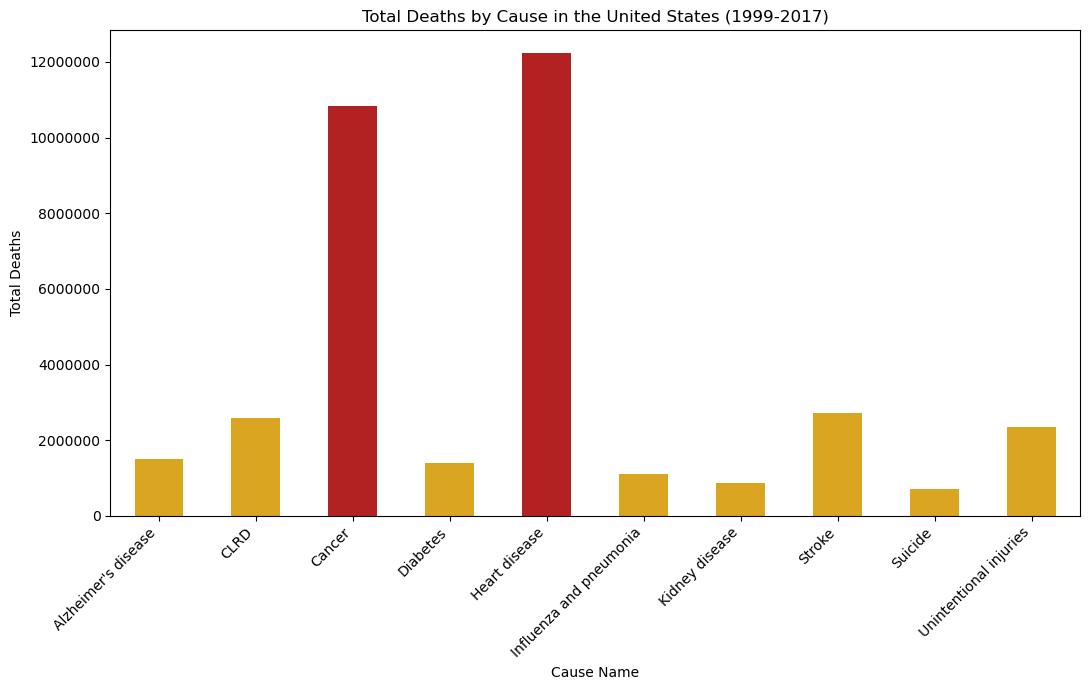

In [28]:
#bar graph showing total deaths per cause over entire dataframe
us_df = death_df[(death_df["State"] == "United States") & 
                 (death_df['Year'].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
custom_colors = ["goldenrod", "goldenrod", "firebrick","goldenrod", "firebrick", "goldenrod","goldenrod", "goldenrod", "goldenrod", "goldenrod","goldenrod", "goldenrod"]
plt.figure(figsize=(11, 7))
cause_deaths.plot(kind='bar', color= custom_colors)
plt.title('Total Deaths by Cause in the United States (1999-2017)')
plt.xlabel("Cause Name")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
# plt.savefig('bar_graph.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

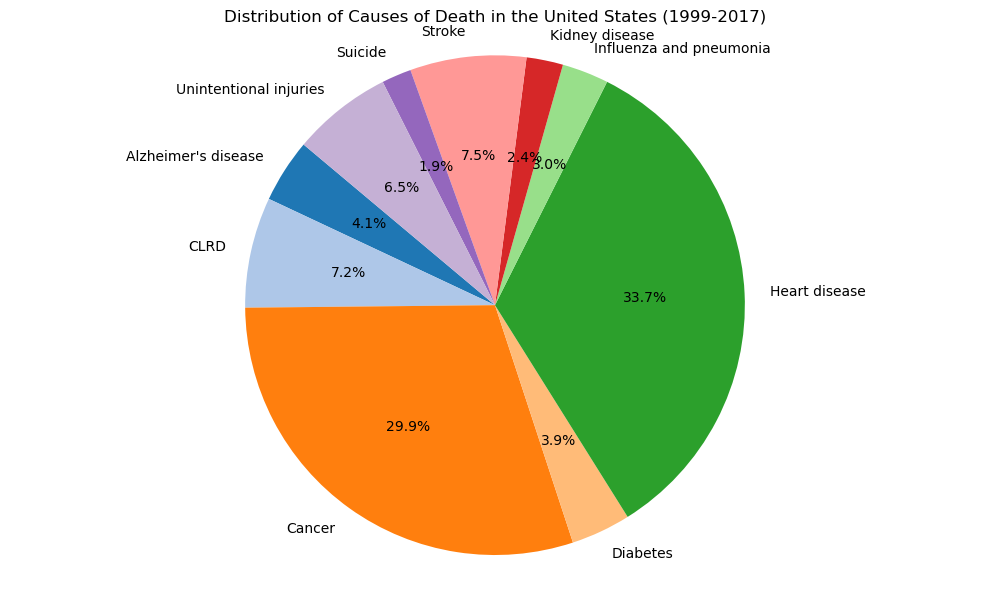

In [36]:
us_df = death_df[(death_df["State"] == "United States") & (death_df["Year"].between(1999, 2017))]
us_df = us_df[us_df['Cause Name'] != "All causes"]
cause_deaths = us_df.groupby('Cause Name')['Deaths'].sum()
plt.figure(figsize=(10, 6))
cause_deaths.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors,)
plt.title('Distribution of Causes of Death in the United States (1999-2017)')
plt.ylabel('')
plt.axis('equal')  
plt.tight_layout()
plt.show()
# plt.savefig('pie_chart.png', format='png', bbox_inches='tight')